In [ ]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [ ]:
#connect to drive
from google.colab import drive
drive.mount ("/content/drive")

In [ ]:
test_set = tf.keras.utils.image_dataset_from_directory(
    '/content/drive/MyDrive/ai/test',
    labels='inferred',
    label_mode='categorical',
    class_names=None,
    color_mode='rgb',
    batch_size=32,
    image_size=(64, 64),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation='bilinear',
    follow_links=False,
    crop_to_aspect_ratio=False,
)


Found 379 files belonging to 36 classes.


Loading Model

In [ ]:
cnn = tf.keras.models.load_model("/content/trained_model.h5")


Visualization and Performing prediction on single image

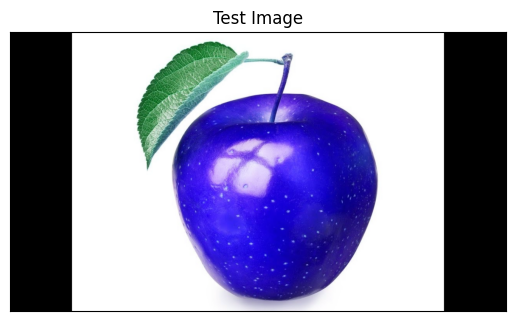

In [ ]:
import cv2
image_path=("/content/drive/MyDrive/ai/test/apple/Image_2.jpg")
img=cv2.imread(image_path)
plt.imshow(img)
plt.title("Test Image")
plt.xticks([])
plt.yticks([])
plt.show()

Testing model

In [ ]:
image = tf.keras.preprocessing.image.load_img(image_path,target_size=(64,64))
input_arr = tf.keras.preprocessing.image.img_to_array(image)
input_arr = np.array([input_arr]) #converting single image to batch
prediction = cnn.predict(input_arr)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 269ms/step


In [ ]:
print(prediction)

[[1.0000000e+00 3.8731880e-27 9.2291112e-22 8.1506836e-24 0.0000000e+00
  1.5507241e-20 3.1465124e-28 2.9280666e-27 1.1822663e-18 6.3976816e-27
  4.7338237e-30 2.9482494e-29 1.9621399e-27 1.0554176e-29 5.0626571e-29
  6.9519935e-25 2.0909436e-34 1.2706506e-29 1.1986080e-28 2.3597569e-30
  5.3800316e-21 2.0773618e-29 1.4386578e-26 1.3570512e-28 5.6526364e-27
  3.9768665e-28 1.2664259e-22 1.5732797e-24 3.1031804e-22 1.4352029e-28
  2.6465237e-31 3.0309591e-30 1.1759135e-36 4.1753648e-25 4.9117300e-28
  7.5546335e-27]]


In [ ]:
test_set.class_names

['apple',
 'banana',
 'beetroot',
 'bell pepper',
 'cabbage',
 'capsicum',
 'carrot',
 'cauliflower',
 'chilli pepper',
 'corn',
 'cucumber',
 'eggplant',
 'garlic',
 'ginger',
 'grapes',
 'jalepeno',
 'kiwi',
 'lemon',
 'lettuce',
 'mango',
 'onion',
 'orange',
 'paprika',
 'pear',
 'peas',
 'pineapple',
 'pomegranate',
 'potato',
 'raddish',
 'soy beans',
 'spinach',
 'sweetcorn',
 'sweetpotato',
 'tomato',
 'turnip',
 'watermelon']

In [ ]:
file = open("labels.txt","w")
for i in test_set.class_names:
  file.write(i+'\n')
file.close()

In [ ]:
with open("labels.txt") as f:
  content=f.readlines()

In [ ]:
content

['apple\n',
 'banana\n',
 'beetroot\n',
 'bell pepper\n',
 'cabbage\n',
 'capsicum\n',
 'carrot\n',
 'cauliflower\n',
 'chilli pepper\n',
 'corn\n',
 'cucumber\n',
 'eggplant\n',
 'garlic\n',
 'ginger\n',
 'grapes\n',
 'jalepeno\n',
 'kiwi\n',
 'lemon\n',
 'lettuce\n',
 'mango\n',
 'onion\n',
 'orange\n',
 'paprika\n',
 'pear\n',
 'peas\n',
 'pineapple\n',
 'pomegranate\n',
 'potato\n',
 'raddish\n',
 'soy beans\n',
 'spinach\n',
 'sweetcorn\n',
 'sweetpotato\n',
 'tomato\n',
 'turnip\n',
 'watermelon\n']

In [ ]:
result_index = np.where(prediction[0]==max(prediction[0]))
print(result_index[0])

[0]


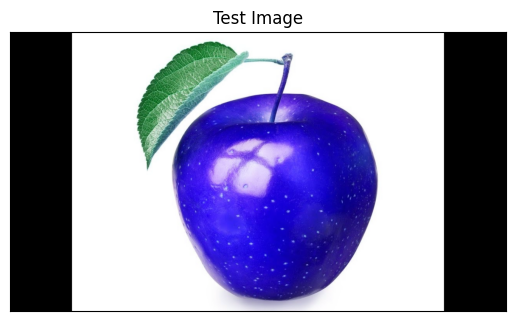

In [ ]:
#display image
plt.imshow(img)
plt.title("Test Image")
plt.xticks([])
plt.yticks([])
plt.show()

In [ ]:
#single prediction
print("It is an image of",format(test_set.class_names[result_index[0][0]]))

It is an image of apple


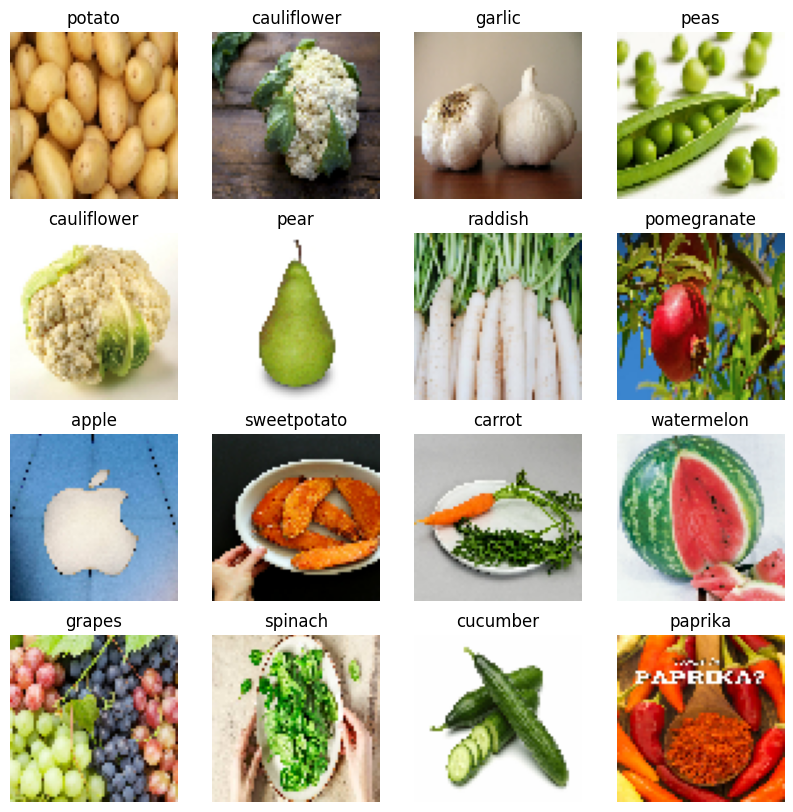

In [ ]:
def show_image_samples(dataset, class_names, num_samples=16):
    plt.figure(figsize=(10, 10))
    for images, labels in dataset.take(1):  # Take one batch
        for i in range(min(num_samples, images.shape[0])):
            ax = plt.subplot(4, 4, i + 1)
            plt.imshow(images[i].numpy().astype("uint8"))
            predicted_class_index = np.argmax(labels[i])
            plt.title(class_names[predicted_class_index])
            plt.axis("off")
    plt.show()

show_image_samples(test_set, test_set.class_names)